# Predicting Credit Card Fraud - A Tour of Basic Regression Techniques

In this project, we will explore data relating to fraudulent credit card transactions. We will run through basic techniques of data exploration and pre-processing, as well as attempt to build a simple model to predict fraudulent transaction using basic regression techniques. The open dataset used for this notebook was obtained from Kaggle (https://www.kaggle.com/harlfoxem/housesalesprediction). Below is a breakdown of the processes that will be outlined in this notebook:

### Contents
    1. Dataset Exploration
    2. Visualiztion
    3. Data Pre-Processing
    4. Regression Models
        1. Linear Regression
        2. Polynomial Regression
        3. Multiple Linear Regression

The objective for the models we will build is as follows:

### Problem Description
Predict the selling price of a house in King County.

Let's begin!

### 1. Data Exploration

We first begin by loading in the necessary packages for the data analysis

In [198]:
# for general handling and manipulation of table data
import pandas as pd
import numpy as np

# for generation of data visualization plots
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# for linear model generation and tools
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# start a random seed for reproducibility of results
np.random.seed(1)

Next we will load the data and get a sense of the general structure of information available

In [199]:
data = pd.read_csv('kc_house_data.csv')

In [200]:
print('data({0[0]},{0[1]})'.format(data.shape))

print('Number of training examples: {0}'.format(data.shape[0]))
print('Number of features for each example: {0}'.format(data.shape[1]))

data(21613,21)
Number of training examples: 21613
Number of features for each example: 21


Below is a list of the labels for each of the 21 data features

In [201]:
pd.DataFrame(data = {'Feature Label': data.columns})

Feature Label
0              id
1            date
2           price
3        bedrooms
4       bathrooms
5     sqft_living
6        sqft_lot
7          floors
8      waterfront
9            view
10      condition
11          grade
12     sqft_above
13  sqft_basement
14       yr_built
15   yr_renovated
16        zipcode
17            lat
18           long
19  sqft_living15
20     sqft_lot15

In [202]:
feature_description = ['id#  of the house sale',
                       'date of sale',
                       'selling price of house',
                       '# of bedrooms',
                       '# of bathrooms',
                       '# of square feet of living space',
                       '# of square feet of the house lot',
                       '# of house floors',
                       'is the property on the waterfront? (N = 0, Y = 1)',
                       'quality of the view from the house (scale from 0-4)',
                       'condition of the house (scale from 1-5)',
                       'house construction quality (scale from 1-13)',
                       '# of square feet for floors above basement floor',
                       '# of square feet in the basement',
                       'year that the house was built',
                       'most recent year that the house was renovated',
                       'zip code area of the house',
                       'latitude coordinate of the house',
                       'longitutde coordinate of the house',
                       'average square feet of living space for nearest 15 neighbors',
                       'average square feet of lot space for nearest 15 neighbors'
                      ]

pd.set_option('display.max_colwidth', -1)
pd.DataFrame(data = {'Label Description': feature_description, 'Feature Label': data.columns})

Feature Label  \
0   id              
1   date            
2   price           
3   bedrooms        
4   bathrooms       
5   sqft_living     
6   sqft_lot        
7   floors          
8   waterfront      
9   view            
10  condition       
11  grade           
12  sqft_above      
13  sqft_basement   
14  yr_built        
15  yr_renovated    
16  zipcode         
17  lat             
18  long            
19  sqft_living15   
20  sqft_lot15      

                                               Label Description  
0   id#  of the house sale                                        
1   date of sale                                                  
2   selling price of house                                        
3   # of bedrooms                                                 
4   # of bathrooms                                                
5   # of square feet of living space                              
6   # of square feet of the house lot                             
7   # of house floors                                             
8   is the property on the waterfront? (N = 0, Y = 1)             
9   quality of the view from the house (scale from 0-4)           
10  condition of the house (scale from 1-5)                       
11  house construction quality (scale from 1-13)                  
12  # of square feet for floors above basement floor              
13  # of square feet in the basement                              
14  year that the house was built                                 
15  most recent year that the house was renovated                 
16  zip code area of the house                                    
17  latitude coordinate of the house                              
18  longitutde coordinate of the house                            
19  average square feet of living space for nearest 15 neighbors  
20  average square feet of lot space for nearest 15 neighbors

For now this gives a basic overview of the data, but we will go on into more detail as we explore the data of each house.

The first look at the dataset contents will be to check if there are any missing entries. Missing data feature entries are not uncommon, and can have a significant impact on the model prediction performance that we fit to our data.

In [203]:
pd.DataFrame(data = {'# of NA Data Entries': data.isnull().sum()})

# of NA Data Entries
id             0                   
date           0                   
price          0                   
bedrooms       0                   
bathrooms      0                   
sqft_living    0                   
sqft_lot       0                   
floors         0                   
waterfront     0                   
view           0                   
condition      0                   
grade          0                   
sqft_above     0                   
sqft_basement  0                   
yr_built       0                   
yr_renovated   0                   
zipcode        0                   
lat            0                   
long           0                   
sqft_living15  0                   
sqft_lot15     0

Lucky! So far we don't have any evidence of missing data entries, but sometimes datasets encode missing entries differently, such as with '-1' entries, dashes '-', blank spaces ' ', etc. so we will be on the lookout for these types of outliers as we explore the features.

### 2. Visualization

Let's now begin to visualize different aspects of the data to see what we can learn about the information contained in the features we've been given.

Starting off we will look at the price variable, which is the main feature of interest we are tasked with predicting. The plot below shows the distribution of prices our dataset contains.

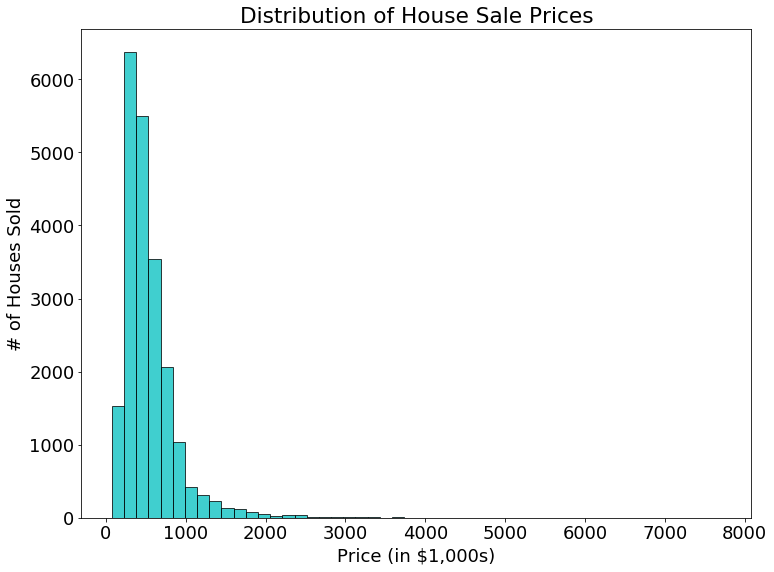

In [204]:
# Initialize figure
plt.figure(figsize = (12,9))

# Add histogram data
plt.hist(data['price']/1000,
         bins = 50,
         facecolor='c',
         edgecolor = 'k',
         alpha=0.75,
        )

# Figure formatting
plt.xlabel('Price (in $1,000s)')
plt.ylabel('# of Houses Sold')
plt.title('Distribution of House Sale Prices')
plt.rcParams.update({'font.size': 18})

# plot!
plt.show()

We can see that we seem to have a large range of house prices. Let's take a look at the price data details:

In [205]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

We have selling prices for houses ranging from $75,000 to **\$7.7 Million**!

We will keep this in mind since we are dealing with a large range of values and outliers beyond approximately $1.1 Million, which may affect the performance of the models used to fit this data.

Next let's take a look at 

We can also get some information on the categorical variables in this dataset. We can do this by subsetting some categorical feature columns that we outlined earlier.
    - bedrooms
    - bathrooms
    - floors
    - waterfront
    - view
    - condition
    - grade

In [206]:
cat_data = data[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']]

cat_counts = cat_data.apply(pd.value_counts)

trace = []
for i in range(cat_counts.shape[0]):
    trace_temp = go.Bar(
        x= np.asarray(cat_data.columns),
        y= cat_counts.values[i],
        name = cat_counts.index[i]
    )
    trace.append(trace_temp)

layout = go.Layout(
    barmode = 'stack',
    title = 'Distribution of Selected Categorical Features'
)

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

There are a few observations we can make from looking at the data above:
    1. Most of the houses have 2-4 bedrooms. There is also a 33(!) bedroom house outlier in our data. This is a significant outlier, but may also be an input typo. We can look at the rest of this entries data to check.
    2. Most houses have less than 3 bathrooms. This variable seems to have many levels due to the distinctions between full bathrooms and half (2 fixtures, such as toilet and sink), quarter (1 fixture, such as just toilet), and three-quarter bathrooms.
    3. Most of the houses have between 1 and 2 floors. Half floors typically represent floor plans where an upper floor does not cover the entire space occupied by the lower floor(s).
    4. Only a few of the houses here are waterfront properties
    5. Most houses don't have a good enough view for them to have a rating above 0.
    6. Both the condition and grade of these houses usually fall within the middle of their respective scales

**Information for 'Grade' Feature** (source: http://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:
- 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
- 4 Generally older, low quality construction. Does not meet code.
- 5 Low construction costs and workmanship. Small, simple design.
- 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
- 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
- 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
- 9 Better architectural design with extra interior and exterior design and quality.
- 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
- 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
- 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

**Information for 'Condition' Feature**

Relative to age and grade. Coded 1-5.

- 1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

- 2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

- 3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

- 4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

- 5 = Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

Finally, let's also take a look at a few of the continous variables we will be working with.

In [207]:
cont_columns = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15']
lot_columns = ['sqft_lot', 'sqft_lot15']

#create boxplots
trace1 = []
for i in range(len(cont_columns)):
    trace_temp = go.Box(
        y= data[cont_columns[i]],
        name = cont_columns[i]
    )

    trace1.append(trace_temp)

layout1 = go.Layout(
    title = 'Distribution of Selected Continuous Features'
)

#create boxplots for 'lot' features
trace2 = []
for i in range(len(lot_columns)):
    trace_temp = go.Box(
        y= data[lot_columns[i]],
        name = lot_columns[i]
    )

    trace2.append(trace_temp)

layout2 = go.Layout(
    title = 'Distribution of "Lot" Features',
    
)

fig1 = go.Figure(data = trace1, layout = layout1)
fig2 = go.Figure(data = trace2, layout = layout2)

iplot(fig1)
iplot(fig2)

A few notes about the lot size data:
    - We have quite a few outlier properties with lot sizes that are enormous when compared to the mean (approx. 5,000 sq. ft.), and even large compared to our living space data. This indicates that the distribution of house sale data we are using includes urban residential and perhaps rural properties such as farm land.
    - It may be useful, given this information, to separate house categories into those that are likely to be farm land vs. the average house properties.
    
For now we will work with the data as-is.

We can also

### 3. Data Pre-processing

Let's begin preparing our data to build our predictive models. To start, we will split the training data into training ("train"), cross-validation ("CV"), and test sets. The data will be split with the following distribution:

    60% train
    20% CV
    20% test

In [208]:
# drop the 'id' and 'date columns from our data, which we will not be using for this analysis
data = data.drop(['id', 'date'], axis = 1)

# Split test set from data
X_temp, X_test, y_temp, y_test = train_test_split(data.drop(['price'], axis = 1), data['price'], test_size=0.2, random_state=42)

# Split remaining data into train and CV sets
X_train, X_CV, y_train, y_CV = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Verify train, CV and test sets
print('Number of training entries: {0} -> {1:.0f}% of data'.format(X_train.shape[0], 100*X_train.shape[0]/data.shape[0]))
print('Number of CV entries: {0} -> {1:.0f}% of data'.format(X_CV.shape[0], 100*X_CV.shape[0]/data.shape[0]))
print('Number of test entries: {0} -> {1:.0f}% of data'.format(X_test.shape[0], 100*X_test.shape[0]/data.shape[0]))

Number of training entries: 12967 -> 60% of data
Number of CV entries: 4323 -> 20% of data
Number of test entries: 4323 -> 20% of data


### 4.1 Linear Regression Model

Our first attempt at predicting house prices will be with a single linear regression. For this model, we will choose one feature to see if we can establish a relationship with the sale price of houses. Since square footage of living space is generally seen as a point of attraction when shopping for a home, we will try this first. Below is a plot of house pricing against our feature, "sqft_living":

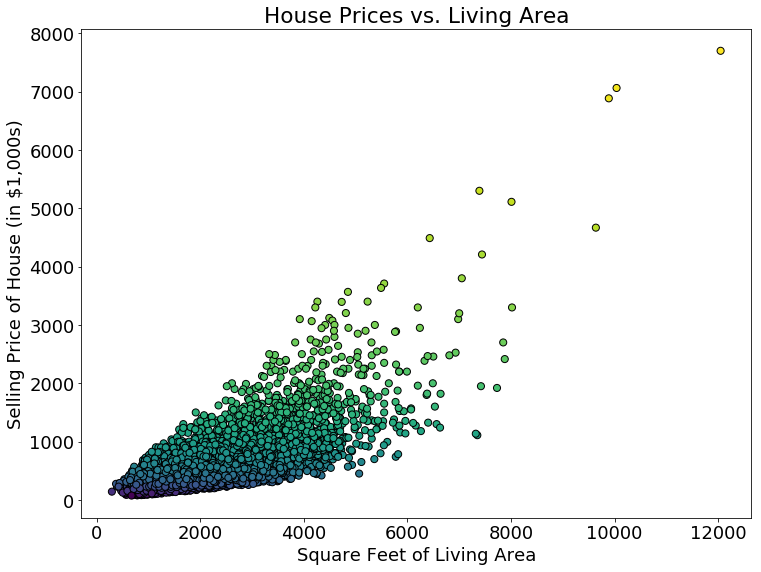

In [209]:
# Create Scatterplot
plt.figure(figsize = (12, 9))
plt.scatter(X_train['sqft_living'], y_train/1000, s = 50, c = np.log(y_train), edgecolor = 'k')

# Figure formatting
plt.xlabel('Square Feet of Living Area')
plt.ylabel('Selling Price of House (in $1,000s)')
plt.title('House Prices vs. Living Area')
plt.rcParams.update({'font.size': 18})

# plot!
plt.show()

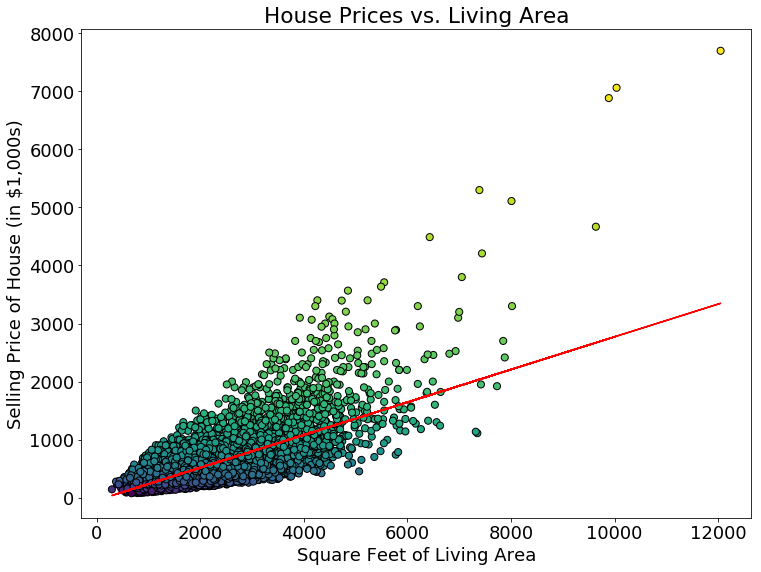

MSE for linear regression model: 67053750782.55


In [211]:
# Initialize linear regression of sqft_living vs. House Sale Price
lm = linear_model.LinearRegression()
fit1 = lm.fit(X_train[['sqft_living']], y_train)
predict1 = lm.predict(X_train[['sqft_living']])

# Create Scatterplot with linear model fit
plt.figure(figsize = (12,9))
plt.scatter(X_train['sqft_living'], y_train/1000, s = 50, c = np.log(y_train), edgecolor = 'k')
plt.plot(X_train['sqft_living'], predict1/1000, c = 'r')

# Plot Formatting
plt.xlabel('Square Feet of Living Area')
plt.ylabel('Selling Price of House (in $1,000s)')
plt.title('House Prices vs. Living Area')
plt.rcParams.update({'font.size': 18})

# Plot!
plt.show()

# Mean Squared Error
print('MSE for linear regression model: {0:.2f}'.format(mean_squared_error(y_train, predict1)))

As we can see, the line we produce follows the trend of the data fairly in the lower range, but we can also see some limitations to this fit. If we use this simple model to predict the selling price of a house, the spread between our predictions and the historic values grows significantly. In the worst case, we could end up with an asking price that is devastatingly below the house's market value!

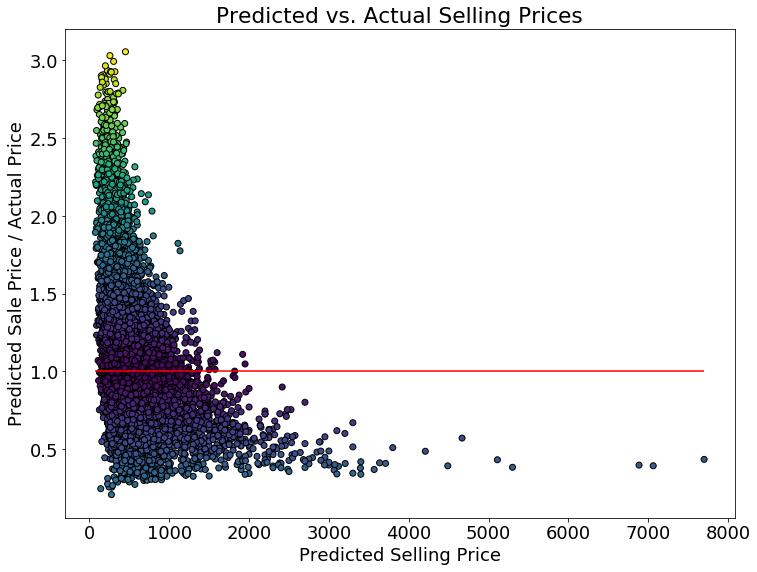

In [212]:
# Create scatterplot
plt.figure(figsize = (12,9))
plt.scatter(y_train/1000, predict1/y_train, c = np.abs(y_train - predict1)/(10*y_train), edgecolor = 'k')

# Plot horizontal line at Predicted Sale Price / Actual Price = 1
plt.hlines(y = 1, xmin = min(y_train/1000), xmax = max(y_train/1000), colors = 'r')

# Plot formatting
plt.xlabel('Predicted Selling Price')
plt.ylabel('Predicted Sale Price / Actual Price')
plt.title('Predicted vs. Actual Selling Prices')
plt.rcParams.update({'font.size': 18})

# Plot!
plt.show()

### 4.2 Polynomial Regression

In order to improve our predictions we have a few options. One option we can try that may improve the performance of our model is polynomial regression. By adding some nonlinearity to our fitting curve, we can capture a better fit to the data at the high end of our price vs. square footage of living area plot that we saw earlier.

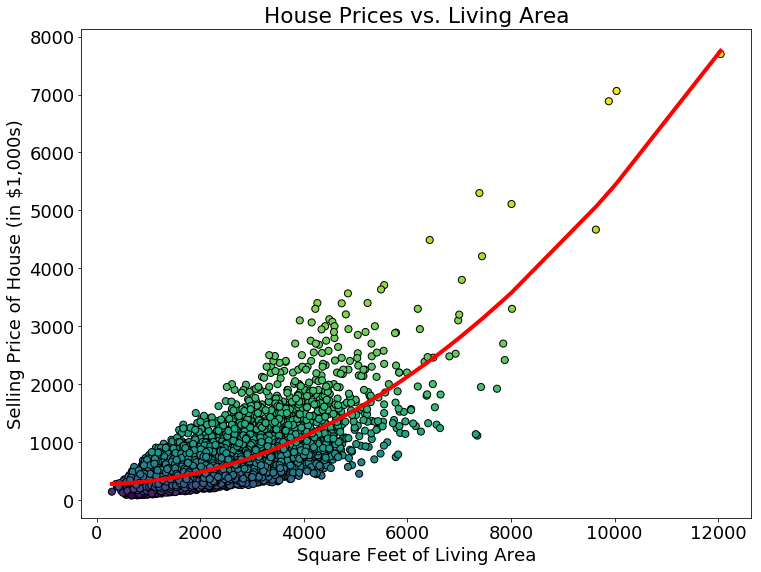

MSE for polynomial (degree = 2) regression model: 58327573050.32


In [213]:
# Generate polynomial feature
poly = PolynomialFeatures(degree = 2)
sqft_living_2 = poly.fit_transform(X_train[['sqft_living']])

# Initialize linear regression model
lm = linear_model.LinearRegression()
fit1 = lm.fit(sqft_living_2, y_train)
predict1 = lm.predict(sqft_living_2)

# Create scatterplot of sqft_living vs. House Sale Price
plt.figure(figsize = (12,9))
plt.scatter(X_train['sqft_living'],
            y_train/1000,
            s = 50,
            c = np.log(y_train),
            edgecolor = 'k'
           )

# Plot polynomial fitting line to data
plt.plot(np.sort(X_train['sqft_living'], axis = 0),
         np.sort(predict1, axis = 0)/1000,
         c = 'r',
         linewidth = 4
        )

# Plot formatting
plt.xlabel('Square Feet of Living Area')
plt.ylabel('Selling Price of House (in $1,000s)')
plt.title('House Prices vs. Living Area')
plt.rcParams.update({'font.size': 18})

# Plot!
plt.show()

# Mean Squared Error
print('MSE for polynomial (degree = 2) regression model: {0:.2f}'.format(mean_squared_error(y_train, predict1)))

Although this improves the fit in the higher range, we can still see that there is a large spread in the data which makes it difficult to predict house prices. Another method we can use to improve the fit is multiple linear regression, where we use more than one feature from our data for our predictions.

### 4.3 Multiple Linear Regression

One issue we can run into with this approach is not knowing which features are most relevant to predicting our target variable. In order to select features, we can use Best Subset Selection, which will score and rank features based on a given metric:

In [214]:
# Select number of features for subset
K = 5
subset = SelectKBest(k = K)
subset.fit(X_train, y_train)

# Display selected subset features
pd.DataFrame(data = {'Subset Features': X_train.columns[subset.get_support()]})

Subset Features
0  bathrooms     
1  sqft_living   
2  grade         
3  sqft_above    
4  sqft_living15

Now we can use our subsets to incrementally add more features to our multiple linear regression model.

In [215]:
# Initialize list for CV_errors and linear regression model (with normalization)
CV_errors = []
lm = linear_model.LinearRegression(normalize = True)

for K in range(1, len(X_train.columns)):
    # Create best subset of K features
    subset = SelectKBest(k = K)
    subset.fit(X_train, y_train)
    X_train_subset = X_train[X_train.columns[subset.get_support()].values.tolist()]
    
    # Perform linear regression on selected features
    fit = lm.fit(X_train_subset, y_train)
    predict = lm.predict(X_CV[X_train.columns[subset.get_support()].values.tolist()])
    CV_errors.append([mean_squared_error(y_CV, predict)])

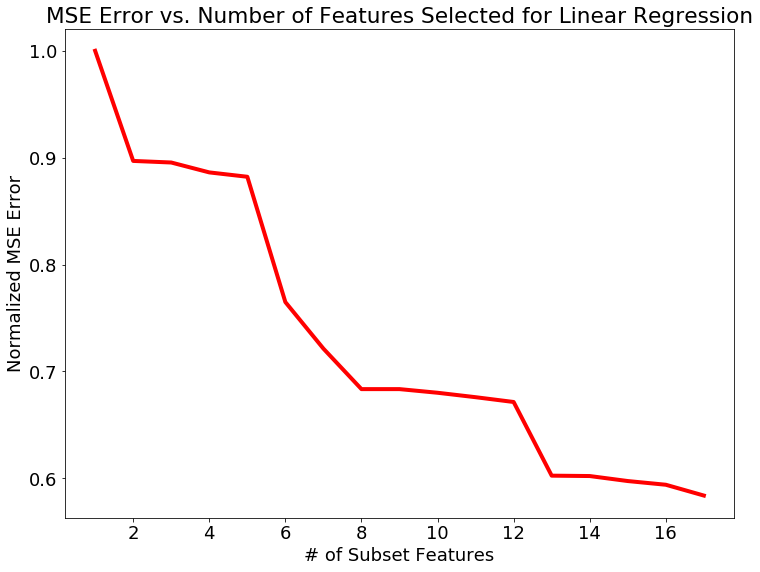

In [216]:
# Plot CV error vs. number of selected features
plt.figure(figsize = (12,9))
plt.plot(range(1, len(X_train.columns)),
         np.divide(CV_errors, CV_errors[0]),
         linewidth = 4,
         c = 'r'
        )

# Plot formatting
plt.xlabel('# of Subset Features')
plt.ylabel('Normalized MSE Error')
plt.title('MSE Error vs. Number of Features Selected for Linear Regression')
plt.rcParams.update({'font.size': 18})

# Plot!
plt.show()

Here we see that by adding in additional features to our initial 'sqft_living' feature, we were able to reduce our error metric by over 40%. This covers some of the basic techniques of regression, although we can certainly improve our model by performing feature engineering in order to improve the fit to our data, which will be covered in a later tutorial.

### The End!